In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png, legend=false, xguide="x̄", yguide="s²",
    markersize=1, markerstrokecolor=:auto, markeralpha=0.3)

function randmeanvar!(dist, X)
    rand!(dist, X)
    mean(X), var(X)
end

function sim(dist::UnivariateDistribution, n; L=10^4)
    X̄ = Vector{Float64}(undef, L)
    S² = similar(X̄)
    X = Vector{Float64}(undef, n)
    for i in 1:L
        X̄[i], S²[i] = randmeanvar!(dist, X)
    end
    X̄, S²
end

function sim_threads(dist::UnivariateDistribution, n; L=10^4)
    X̄ = Vector{Float64}(undef, L)
    S² = similar(X̄)
    Xtmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        X = Xtmp[Threads.threadid()]
        X̄[i], S²[i] = randmeanvar!(dist, X)
    end
    X̄, S²
end

sim_threads (generic function with 1 method)

In [2]:
dist = MixtureModel([Normal(), Normal(20)], [0.95, 0.05])
n = 1000

1000

  0.354926 seconds (150.01 k allocations: 10.829 MiB, 3.17% gc time, 30.78% compilation time)
  0.239419 seconds (50.01 k allocations: 4.128 MiB)
  0.241421 seconds (50.01 k allocations: 4.128 MiB)


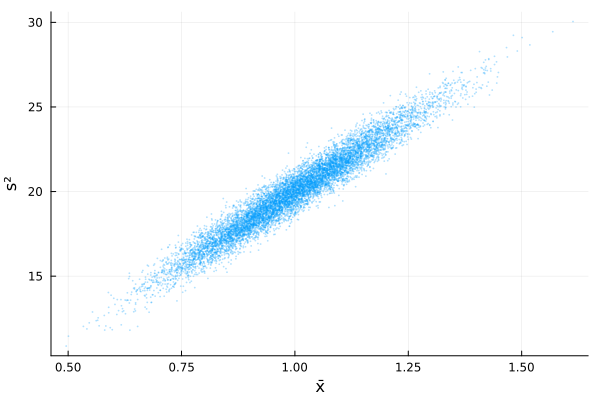

In [3]:
@time X̄, S² = sim(dist, n)
@time X̄, S² = sim(dist, n)
@time X̄, S² = sim(dist, n)
scatter(X̄, S²)

Threads.nthreads() = 12
  0.137033 seconds (137.84 k allocations: 10.152 MiB, 248.22% compilation time)
  0.039131 seconds (50.09 k allocations: 4.221 MiB)
  0.038444 seconds (50.21 k allocations: 4.232 MiB)


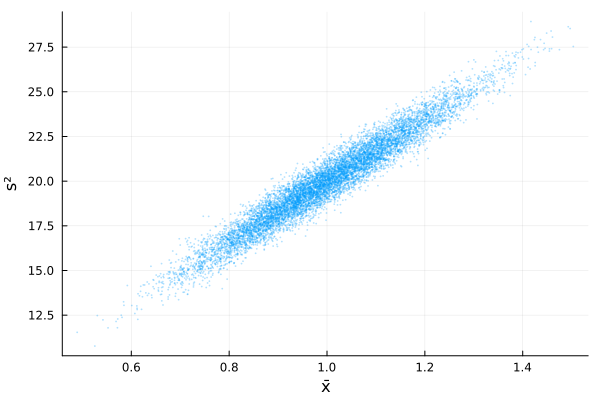

In [4]:
@show Threads.nthreads()
@time X̄, S² = sim_threads(dist, n)
@time X̄, S² = sim_threads(dist, n)
@time X̄, S² = sim_threads(dist, n)
scatter(X̄, S²)